<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load the Data
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 3: Sample a Subset of the Data
df_sampled = df.sample(frac=0.1, random_state=42)
df_sampled.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5701,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5489,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8205,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1650,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 4: Pre-processing
# Split sampled dataset into features and labels
X_sampled = df_sampled.drop('label', axis=1)  # features
y_sampled = df_sampled['label']  # labels
# Impute missing values if there are any
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_sampled_imputed = imputer.fit_transform(X_sampled)


In [ ]:
# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled_imputed, y_sampled, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Feature Engineering using PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.116 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.116 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.116 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.110 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.205 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.755 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.719 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.116 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

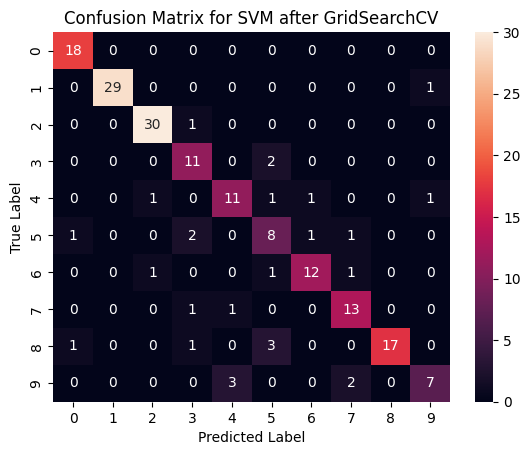

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.97      0.98        30
           2       0.94      0.97      0.95        31
           3       0.69      0.85      0.76        13
           4       0.73      0.73      0.73        15
           5       0.53      0.62      0.57        13
           6       0.86      0.80      0.83        15
           7       0.76      0.87      0.81        15
           8       1.00      0.77      0.87        22
           9       0.78      0.58      0.67        12

    accuracy                           0.85       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
# Step 7: Hyperparameter Tuning for SVM using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']  # Assuming you want to try both RBF and linear kernels
}
# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
# Standardize the features (necessary for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)
# Fit the GridSearchCV object to the training data
grid.fit(X_train_scaled, y_train)
# Print the best parameters and estimator found by GridSearchCV
print(grid.best_params_)
print(grid.best_estimator_)
# Make predictions with the best found hyperparameحters
grid_predictions = grid.predict(X_test_scaled)
# Confusion matrix for the results of GridSearchCV
cmG = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cmG, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM after GridSearchCV')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Classification report for the results of GridSearchCV
print(classification_report(y_test, grid_predictions))

In [ ]:
# Step 7: Model Training
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)
# SVM
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_pca, y_train)
best_svm_classifier = SVC(**grid.best_params_)
best_svm_classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
# Step 8: Model Evaluation
# Decision Tree Evaluation
dt_predictions = dt_classifier.predict(X_test_pca)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_cv_scores = cross_val_score(dt_classifier, pca.transform(X_sampled_imputed), y_sampled, cv=5)
print("Decision Tree Classifier Report")
print(classification_report(y_test, dt_predictions))
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree CV Accuracy: {np.mean(dt_cv_scores)}")


Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.96      0.87      0.91        30
           2       0.82      0.74      0.78        31
           3       0.70      0.54      0.61        13
           4       0.36      0.33      0.34        15
           5       0.33      0.54      0.41        13
           6       0.64      0.60      0.62        15
           7       0.61      0.73      0.67        15
           8       0.63      0.55      0.59        22
           9       0.42      0.67      0.52        12

    accuracy                           0.64       184
   macro avg       0.61      0.61      0.60       184
weighted avg       0.67      0.64      0.64       184

Decision Tree Accuracy: 0.6358695652173914
Decision Tree CV Accuracy: 0.5746495604656687


In [ ]:
#SVM Evaluation
svm_predictions = svm_classifier.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_cv_scores = cross_val_score(svm_classifier, pca.transform(X_sampled_imputed), y_sampled, cv=5)
print("Support Vector Machine Classifier Report")
print(classification_report(y_test, svm_predictions))
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM CV Accuracy: {np.mean(svm_cv_scores)}")

Support Vector Machine Classifier Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      0.97      0.97        30
           2       0.94      0.97      0.95        31
           3       0.79      0.85      0.81        13
           4       0.92      0.80      0.86        15
           5       0.85      0.85      0.85        13
           6       0.88      0.93      0.90        15
           7       0.94      1.00      0.97        15
           8       0.90      0.86      0.88        22
           9       0.83      0.83      0.83        12

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184

SVM Accuracy: 0.9130434782608695
SVM CV Accuracy: 0.895408648134949


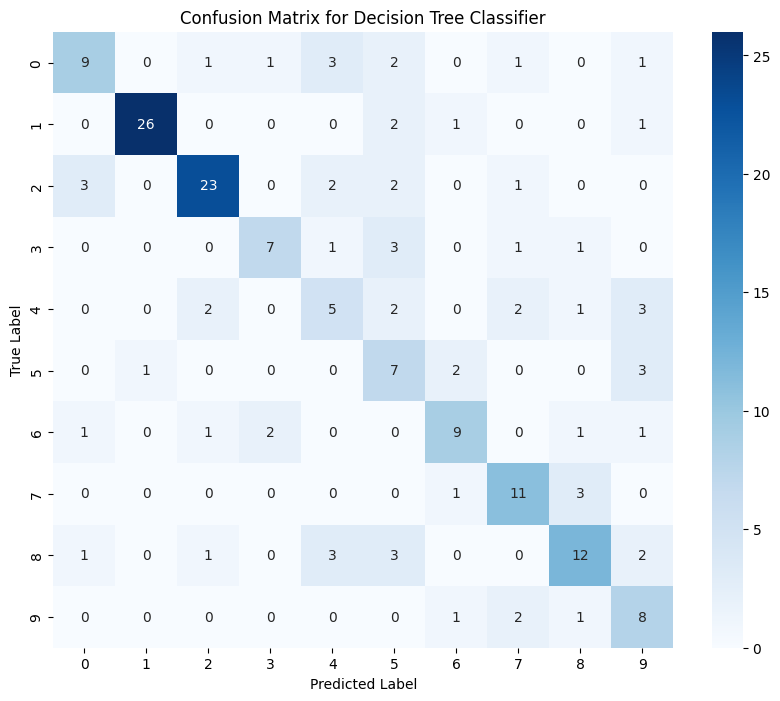

In [ ]:
# Step 9: Visualization
# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

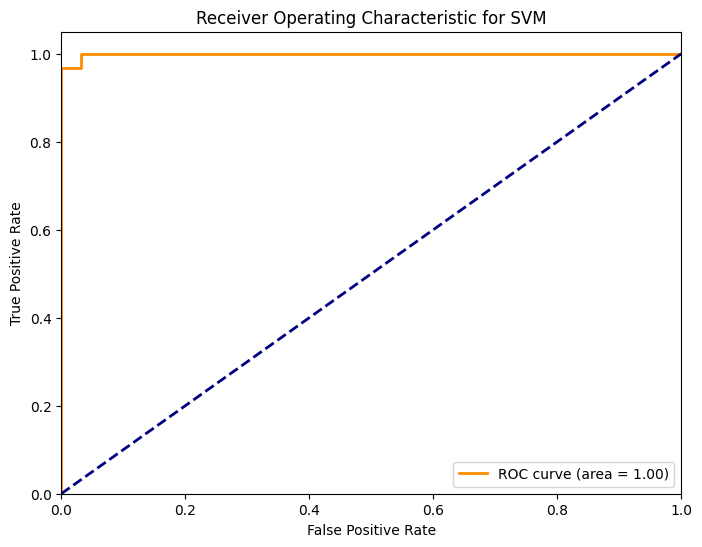

In [ ]:
# ROC Curve for SVM
svm_probs = svm_classifier.predict_proba(X_test_pca)[:, 1]  # probabilities for the positive outcome
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label=1)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

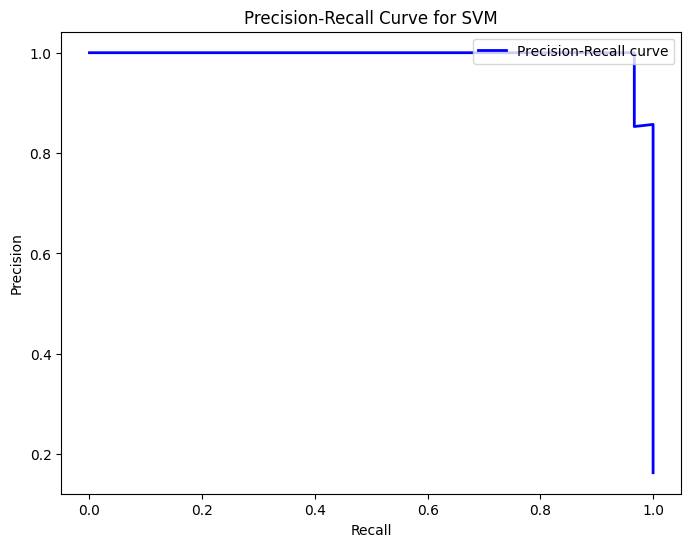

In [ ]:
# Precision-Recall Curve for SVM
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(svm_recall, svm_precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc="upper right")
plt.show()